In [77]:
import icf
import matplotlib.pyplot as plt
import numpy as np
name_list = ["Horizontal.csv","45_Degrees.csv","Vertical.csv","135_Degrees.csv"]
xdata = []
ydata = []
for n in  range(0,len(name_list)):
    xd, yd = icf.load_2col(name_list[n])
    xdata.append(xd)
    ydata.append(yd)


In [78]:
for x in range (0,len(xdata)):
    xdata[x] *= 60 #resolution
    xdata[x] /= 3.5 #magnitication effect

In [79]:
import statistics as s
for x in range (0,len(xdata)):
    print("Mean:", s.mean(xdata[x]))
    print("Variance: ", s.variance(xdata[x]))
    print("Population stdev: ", s.pstdev(xdata[x]))
    print("Sample stdev: ", s.stdev(xdata[x]))

Mean: 437.14285714285717
Variance:  67493.87755102041
Population stdev:  257.28567462520516
Sample stdev:  259.79583820958413
Mean: 351.42857142857144
Variance:  44228.57142857143
Population stdev:  207.78717526373381
Sample stdev:  210.30589965231937
Mean: 291.42857142857144
Variance:  30857.14285714286
Population stdev:  173.13437037192134
Sample stdev:  175.66201313073597
Mean: 325.7142857142857
Variance:  38204.08163265306
Population stdev:  192.9364916129615
Sample stdev:  195.45864430270936


In [80]:
# Data Mask

for n in range (len(xdata)):
    xmin = icf . find_closest ( xdata[n] , 0 )
    xmax = icf . find_closest ( xdata[n] , 700 )
    print(xmin)
    print(xmax)
    xdata[n] = xdata[n] [ xmin : xmax]
    ydata[n] = ydata[n] [ xmin : xmax ]


0
41
0
41
0
34
0
38


Our initial guess is [4282, 411, 169, 27878, np.float64(1.6551208333333316)]
Parameter 0 : 2935.3741323443755 +/- 73.65950248112601
Parameter 1 : 374.69984042787127 +/- 2.379161133938224
Parameter 2 : 146.51273374309955 +/- 1.764831665175038
Parameter 3 : 28319.372095723986 +/- 76.53590435280816
Parameter 4 : 1.2182970773699218 +/- 0.1890386771481195
Fit parameters :  [2.93537413e+03 3.74699840e+02 1.46512734e+02 2.83193721e+04
 1.21829708e+00]
Fit standard deviations :  [73.65950248  2.37916113  1.76483167 76.53590435  0.18903868]
R^2 =  0.9814511257379372
Calculated Full Width Half Max 345.0111222705332


<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_33746/3230517105.py:68: SyntaxWarning: invalid escape sequence '\m'
  icf.fit_plot(xdata[n], ydata[n], yfit[n],xl = 'Distance ($\mu m$)',yl = "Greyscale Value",title = name_list[n][0:-4])


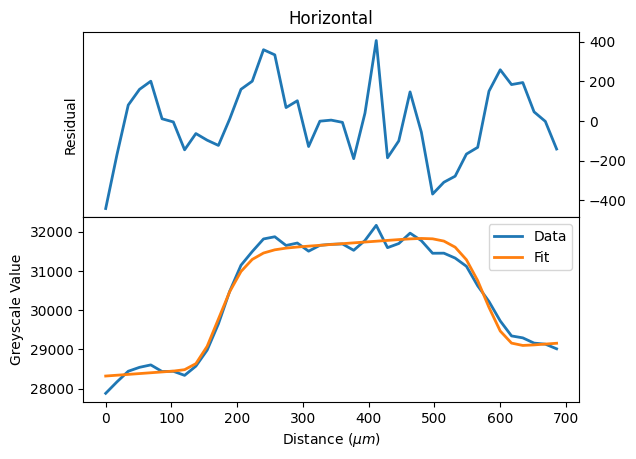

Our initial guess is [3333, 274, 169, 28592, np.float64(0.36937395833333314)]
Parameter 0 : 2800.9851481446613 +/- 57.48644142779844
Parameter 1 : 321.8979936365661 +/- 2.033942028470215
Parameter 2 : 154.82867229704735 +/- 1.4865992521421107
Parameter 3 : 28655.526144805262 +/- 74.72481938642935
Parameter 4 : 0.6077193125557392 +/- 0.14805351012231302
Fit parameters :  [2.80098515e+03 3.21897994e+02 1.54828672e+02 2.86555261e+04
 6.07719313e-01]
Fit standard deviations :  [57.48644143  2.03394203  1.48659925 74.72481939  0.14805351]
R^2 =  0.9857948718330476
Calculated Full Width Half Max 364.59366107061516


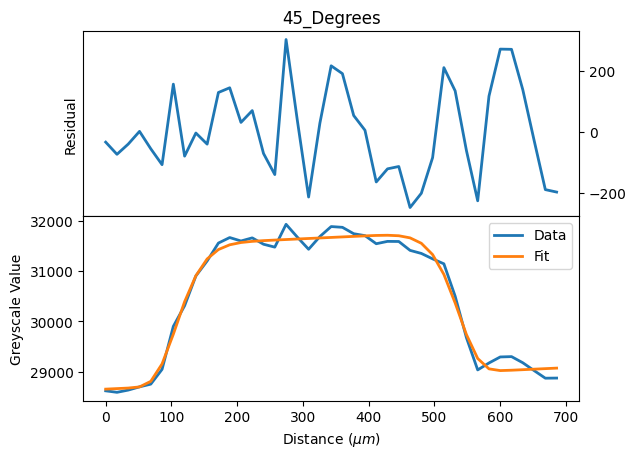

Our initial guess is [3280, 222, 169, 28661, np.float64(-0.23636313131313122)]
Parameter 0 : 2785.671609517055 +/- 61.853431041798174
Parameter 1 : 288.88959079019884 +/- 1.9432877373181454
Parameter 2 : 144.04282798755227 +/- 1.3692327818718506
Parameter 3 : 29009.782969134263 +/- 73.54591092983489
Parameter 4 : -0.29083196570537523 +/- 0.1910150566870544
Fit parameters :  [ 2.78567161e+03  2.88889591e+02  1.44042828e+02  2.90097830e+04
 -2.90831966e-01]
Fit standard deviations :  [61.85343104  1.94328774  1.36923278 73.54591093  0.19101506]
R^2 =  0.9875002519072065
Calculated Full Width Half Max 339.1949386880331


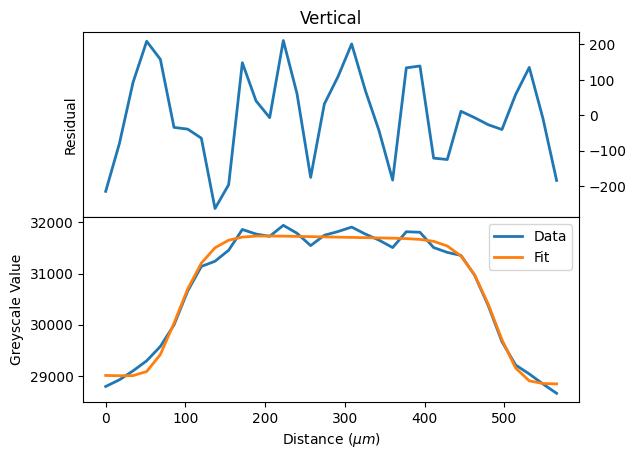

Our initial guess is [3606, 308, 169, 28357, np.float64(-0.8319594594594606)]
Parameter 0 : 2917.1725497915018 +/- 45.858997703923805
Parameter 1 : 328.3502929126738 +/- 1.433785530309295
Parameter 2 : 140.0546386568451 +/- 1.054813994142147
Parameter 3 : 29085.097128470174 +/- 52.009696647010955
Parameter 4 : -0.8756283759150474 +/- 0.12685380231891244
Fit parameters :  [ 2.91717255e+03  3.28350293e+02  1.40054639e+02  2.90850971e+04
 -8.75628376e-01]
Fit standard deviations :  [45.8589977   1.43378553  1.05481399 52.00969665  0.1268538 ]
R^2 =  0.9921655474982471
Calculated Full Width Half Max 329.8034705087053


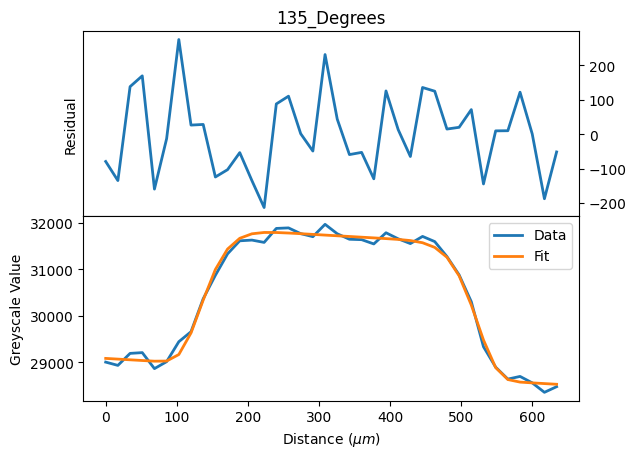

In [81]:
import numpy as np
from scipy.optimize import curve_fit
import icf
p = 8

# This function will generate a perfect Gaussian 
# You can replace this function with any other you want to fit with...
def gaussian(x, *params):

	A = params[0]
	x0 = params[1]
	c = params[2]
	y0 = params[3]
	
	return A*np.exp(-(x-x0)**2/(2*c*c))

def super_gaussian(x, *params):

	A = params[0]
	x0 = params[1]
	c = params[2]
	y0 = params[3]
	y1 = params[4]
	
	return y0 + y1*x+ A*np.exp(-((x-x0)/(np.sqrt(2)*c))**(p))


	
yfit  = []
for n in range(0,len(xdata)):
	yfit.append([])
calculated_radius = []	
#
# This makes a gaussian using these x points
for n in range(len(xdata)):



	#
	# This section will do a fit
	#

	# This does the fit, and returns the fit parameters and the covariances

	guess = [int(np.max(ydata[n])-np.min(ydata[n])),int(xdata[n][np.argmax(ydata[n])]),int(400/(2*np.sqrt(2*np.log(2)))),int(np.min(ydata[n])),(ydata[n][-1]-ydata[n][0])/xdata[n][-1]]
	print("Our initial guess is", guess)
	popt, pcov = curve_fit(super_gaussian, xdata[n], ydata[n], p0=guess)


	for i in range(len(popt)):
		print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
		
	print("Fit parameters : ", popt)
	print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))


	# This generates a new list with a Gaussian using the identified fit parameters
	# This data is therefore the best fit curve 
	yfit[n] = super_gaussian(xdata[n], *popt)

	print("R^2 = ", icf.r_squared(ydata[n], yfit[n]))
	calculated_radius.append(popt[2]*2*np.sqrt(2*np.log(2)))
	print("Calculated Full Width Half Max", calculated_radius[n])

	# This will plot the output, both the original data and the best fit, as well as a residual
	# Note this is a special plotting routine written for the icf labs, hence the 'icf' prefix
	# The source code can be found in icf.py if you want to copy/alter it
	icf.fit_plot(xdata[n], ydata[n], yfit[n],xl = 'Distance ($\mu m$)',yl = "Greyscale Value",title = name_list[n][0:-4])

In [82]:
FWHM = np.mean(calculated_radius)
FWHM_min = np.percentile(calculated_radius,25)
FWHM_max = np.percentile(calculated_radius,75)
print("average FWHM",FWHM)
print(FWHM_min)
print(FWHM_max)
#implement width measurement
def Calculate_Size(FWHM_l):
    return np.sqrt(FWHM_l**2 - PSF_squared)
pinhole_size = 15
microchannel_size = 27
Digitisation_size = 60
PSF_squared = pinhole_size**2 + microchannel_size**2 + Digitisation_size**2
print("Calculated diameter",Calculate_Size(FWHM))
print("Calculated min diameter",Calculate_Size(FWHM_min))
print("Calculated max diameter",Calculate_Size(FWHM_max))



average FWHM 344.65079813447164
336.84707164320116
349.90675697055366
Calculated diameter 337.9795447282695
Calculated min diameter 330.01810507091864
Calculated max diameter 343.337645144907


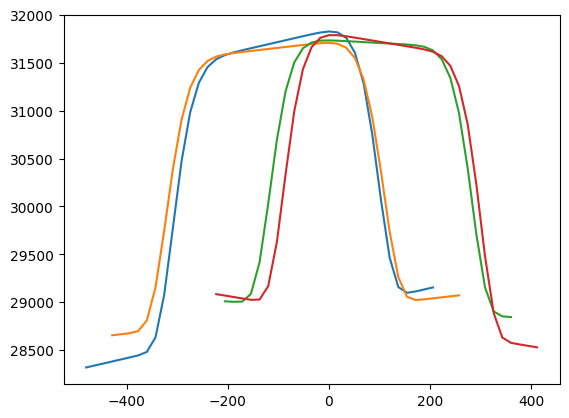

In [83]:
for n in range (0,len(xdata)):
    position_ymax = np.argmax(yfit[n])
    plt.plot(xdata[n]-xdata[n][position_ymax], yfit[n])
plt.show()

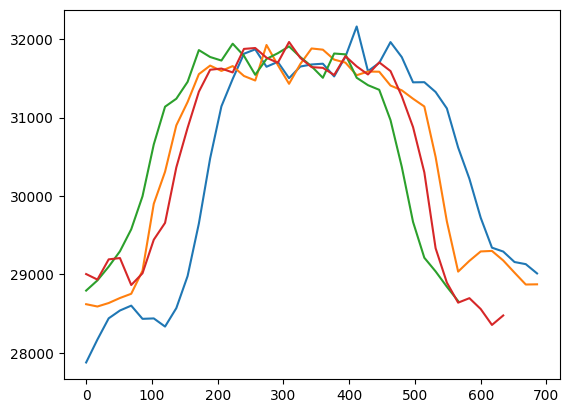

In [84]:
for n in range (0,len(xdata)):
    plt.plot(xdata[n], ydata[n])
plt.show()
